In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

Import packages


In [ ]:
def loaddata(file, delimiter):
  data = np.loadtxt(file, delimiter=delimiter)
  print('dimensions: ', data.shape)
  print(data[0:6,:])
  return(data)

# Question 1

In [ ]:
data = loaddata('Dataset-2.txt', ',')

dimensions:  (118, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)

    axes.legend(frameon= True, fancybox = True);


Question 1


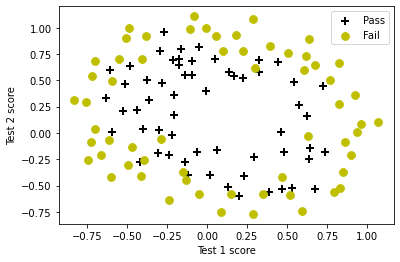

In [ ]:
plotData(data, 'Test 1 score', 'Test 2 score', 'Pass', 'Fail')


# Question 2

The data cannot be separated by a linear decision boundary

# Question 3

In [ ]:
X = np.c_[data[:,2:0], data[:,0:2]]
y = np.c_[data[:,2]]


# Question 4

In [ ]:
poly = PolynomialFeatures(6)
X = poly.fit_transform(X, True)

In [ ]:
print(X.shape)
print(X)

(118, 28)
[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


In [ ]:
def sigmoid(z):
  return(1 / (1 + np.exp(-z)))

# Question 5/6

In [ ]:
print(X.shape[0])
print(X.shape[1])

118
28


# REG = 0

In [ ]:
def costFunc(theta, X, y, reg):
  m = y.size
  f = sigmoid(X.dot(theta))
  J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))
  J2 = (reg / 2 * m) * theta[1:].T.dot(theta[1:])
  J = J + J2

  return J

In [ ]:
def Gradient(theta, X, y, reg):
    m = y.size
    f = sigmoid(X.dot(theta.reshape(-1,1)[0:]))
    grad = ((1 / m)*(X.T.dot(f - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel()

    return (grad.flatten())

In [ ]:
initial_theta = np.zeros(X.shape[1])

cost = costFunc(initial_theta, X, y, reg = 0)
print('Cost: ', cost)
grad = Gradient(initial_theta, X, y, reg = 0)
print('Grad: ', grad)

Cost:  [0.69314718]
Grad:  [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]
28


In [ ]:
def gradient_descent(alpha, x, y, numIters):
  m = y.size
  theta = np.ones(X.shape[1])
  for iter in range(0, numIters):
    J = costFunc(theta, x, y, reg=0)
    grad = Gradient(theta, x, y, reg=0)
    print(iter, J)
    theta = theta - alpha * grad
  return theta

In [ ]:
alpha = 0.01
theta0 = gradient_descent(alpha, X, y, 10000)

Streaming output truncated to the last 5000 lines.
5000 [0.57709717]
5001 [0.5770672]
5002 [0.57703723]
5003 [0.57700727]
5004 [0.57697732]
5005 [0.57694737]
5006 [0.57691744]
5007 [0.5768875]
5008 [0.57685758]
5009 [0.57682766]
5010 [0.57679774]
5011 [0.57676784]
5012 [0.57673794]
5013 [0.57670804]
5014 [0.57667816]
5015 [0.57664828]
5016 [0.57661841]
5017 [0.57658854]
5018 [0.57655868]
5019 [0.57652883]
5020 [0.57649898]
5021 [0.57646914]
5022 [0.57643931]
5023 [0.57640948]
5024 [0.57637966]
5025 [0.57634985]
5026 [0.57632004]
5027 [0.57629024]
5028 [0.57626045]
5029 [0.57623066]
5030 [0.57620088]
5031 [0.57617111]
5032 [0.57614134]
5033 [0.57611158]
5034 [0.57608183]
5035 [0.57605208]
5036 [0.57602234]
5037 [0.57599261]
5038 [0.57596288]
5039 [0.57593316]
5040 [0.57590344]
5041 [0.57587374]
5042 [0.57584404]
5043 [0.57581434]
5044 [0.57578465]
5045 [0.57575497]
5046 [0.5757253]
5047 [0.57569563]
5048 [0.57566597]
5049 [0.57563632]
5050 [0.57560667]
5051 [0.57557703]
5052 [0.57554739

In [ ]:
print(theta0)

[ 1.21005746  0.24315037  0.98740396 -2.30212304 -1.24028152 -1.25951965
  0.18502385 -0.04875889 -0.09006191 -0.20950002 -1.52725494  0.34315736
 -0.01539178  0.09526203 -1.1978155  -0.03179415  0.39196523  0.63869755
  0.40534803  0.25067716 -0.52002208 -0.93226177  0.68636575  0.49078323
  0.76668215  0.43769244  0.46376166 -1.01435486]


TypeError: ignored

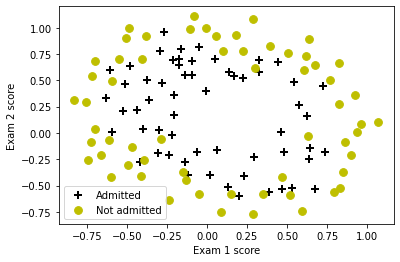

In [ ]:
from matplotlib import axes
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x0_min, x0_max = X[:,0].min(), X[:,0].max(),
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max), np.linspace(x1_min, x1_max))
c = np.zeros(2)


Though I couldn't get the graph to work, by knowing trends of regularization, I expect the graph to be overfitting and attempting to accomodate every point, potentially making a circle around outliers to include them in the correct class

In [ ]:
def classify(theta, X, threshold=0.5):
    p1 = sigmoid(X.dot(theta0)) >= threshold
    return(p1.astype('int'))

In [ ]:
p1 = classify(theta0, X)
print('Train accuracy for reg = 0 {}%'.format(100*sum(p1 == y.ravel())/p.size))

Train accuracy for reg = 0 79.66101694915254%


# REG = 1

In [ ]:
def gradient_descent(alpha, x, y, numIters):
  m = y.size
  theta = np.ones(X.shape[1])
  for iter in range(0, numIters):
    J = costFunc(theta, x, y, reg=1)
    grad = Gradient(theta, x, y, reg=1)
    print(iter, J)
    theta = theta - alpha * grad
  return theta

In [ ]:
alpha = 0.01
theta1 = gradient_descent(alpha, X, y, 10000)

Streaming output truncated to the last 5000 lines.
5000 [316.18917269]
5001 [316.21908003]
5002 [316.24900329]
5003 [316.27894243]
5004 [316.30889746]
5005 [316.33886837]
5006 [316.36885513]
5007 [316.39885775]
5008 [316.42887622]
5009 [316.45891052]
5010 [316.48896064]
5011 [316.51902658]
5012 [316.54910832]
5013 [316.57920585]
5014 [316.60931917]
5015 [316.63944827]
5016 [316.66959312]
5017 [316.69975373]
5018 [316.72993009]
5019 [316.76012218]
5020 [316.79032999]
5021 [316.82055352]
5022 [316.85079276]
5023 [316.88104769]
5024 [316.9113183]
5025 [316.94160459]
5026 [316.97190654]
5027 [317.00222415]
5028 [317.0325574]
5029 [317.06290629]
5030 [317.0932708]
5031 [317.12365093]
5032 [317.15404667]
5033 [317.184458]
5034 [317.21488492]
5035 [317.24532741]
5036 [317.27578547]
5037 [317.30625909]
5038 [317.33674825]
5039 [317.36725295]
5040 [317.39777317]
5041 [317.42830892]
5042 [317.45886017]
5043 [317.48942691]
5044 [317.52000915]
5045 [317.55060686]
5046 [317.58122005]
5047 [317.6118

In [ ]:
print(theta1)

[ 0.96951687  0.2489853   0.79238142 -1.67501738 -0.76273663 -0.96196301
  0.06875246 -0.12736227 -0.14828982 -0.18258601 -1.16295955  0.12222412
 -0.20086298 -0.0239861  -0.92476794 -0.12769563  0.10061864  0.24516837
  0.09033993  0.02647953 -0.44061132 -0.76974395  0.29154269  0.11449362
  0.32728104  0.08338586  0.1669037  -0.80100982]


TypeError: ignored

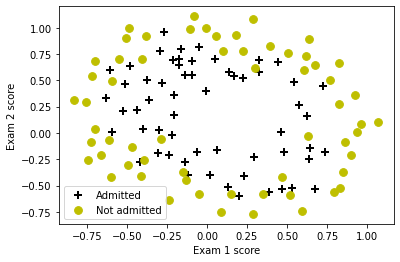

In [ ]:
from matplotlib import axes
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x0_min, x0_max = X[:,0].min(), X[:,0].max(),
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max), np.linspace(x1_min, x1_max))

for i in range(len(xx0)):
  for j in range(len(xx1)):
    fxx1,fxx0 = (xx0[i], xx1[j])
    z = (fxx0, fxx1)
plt.contour(xx0, xx1, z, [0.5], linewidths=1, colors='b');

With regularization low but not zero, the graph can be expected to fit the data decently, not correcting to include outliers

In [ ]:
def classify(theta, X, threshold=0.5):
    p2 = sigmoid(X.dot(theta1)) >= threshold
    return(p2.astype('int'))

In [ ]:
p2 = classify(theta1, X)
print('Train accuracy for reg = 0 {}%'.format(100*sum(p2 == y.ravel())/p.size))

Train accuracy for reg = 0 82.20338983050847%


# REG = 100

In [ ]:
def gradient_descent(alpha, x, y, numIters):
  m = y.size
  theta = np.ones(X.shape[1])
  for iter in range(0, numIters):
    J = costFunc(theta, x, y, reg=100)
    grad = Gradient(theta, x, y, reg=100)
    print(iter, J)
    theta = theta - alpha * grad
  return theta

In [ ]:
alpha = 0.01
theta100 = gradient_descent(alpha, X, y, 10000)

Streaming output truncated to the last 5000 lines.
5000 [85.66047761]
5001 [85.66047405]
5002 [85.66047051]
5003 [85.66046697]
5004 [85.66046344]
5005 [85.66045992]
5006 [85.6604564]
5007 [85.6604529]
5008 [85.6604494]
5009 [85.66044591]
5010 [85.66044243]
5011 [85.66043895]
5012 [85.66043549]
5013 [85.66043203]
5014 [85.66042858]
5015 [85.66042513]
5016 [85.6604217]
5017 [85.66041827]
5018 [85.66041485]
5019 [85.66041144]
5020 [85.66040803]
5021 [85.66040464]
5022 [85.66040125]
5023 [85.66039787]
5024 [85.66039449]
5025 [85.66039113]
5026 [85.66038777]
5027 [85.66038442]
5028 [85.66038107]
5029 [85.66037774]
5030 [85.66037441]
5031 [85.66037109]
5032 [85.66036777]
5033 [85.66036447]
5034 [85.66036117]
5035 [85.66035788]
5036 [85.66035459]
5037 [85.66035132]
5038 [85.66034805]
5039 [85.66034479]
5040 [85.66034153]
5041 [85.66033828]
5042 [85.66033504]
5043 [85.66033181]
5044 [85.66032859]
5045 [85.66032537]
5046 [85.66032216]
5047 [85.66031896]
5048 [85.66031576]
5049 [85.66031257]
505

In [ ]:
print(theta100)

[ 0.02187771 -0.01748172  0.00571079 -0.05516895 -0.01314877 -0.03859858
 -0.01846356 -0.00773219 -0.00892429 -0.02280452 -0.04343846 -0.00235623
 -0.01415612 -0.00349508 -0.04143588 -0.02100593 -0.00471917 -0.00359131
 -0.00632226 -0.00502441 -0.03197676 -0.03416335 -0.00107629 -0.00702615
 -0.00038506 -0.0079823  -0.00154779 -0.04108677]


(118, 1)


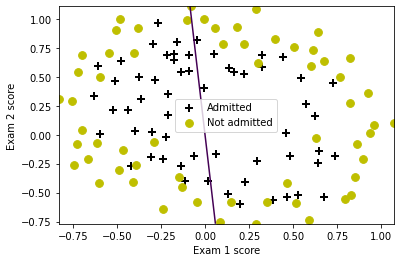

In [ ]:
from matplotlib import axes
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x0_min, x0_max = X[:,0].min(), X[:,0].max(),
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max), np.linspace(x1_min, x1_max))
c1 = sigmoid(np.c_[xx0.ravel(), xx1.ravel()].dot(theta100))
c = c.reshape(xx0.shape)
plt.contour(xx0, xx1, c, [0.5])

With high regularization, the graph dramatically underfits the data, allowing many points to go incorrectly classified

In [ ]:
def classify(theta, X, threshold=0.5):
    p3 = sigmoid(X.dot(theta100.T)) >= threshold
    return(p3.astype('int'))

In [ ]:
p3 = classify(theta100, X)
print('Train accuracy for reg = 0 {}%'.format(100*sum(p3 == y.ravel())/p.size))

Train accuracy for reg = 0 61.016949152542374%


# Question 7

The best accuracy comes from λ = 1, with an accuracy of 82.20%